In [ ]:
!pip install ultralytics
!pip install -U ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.2/800.2 kB 7.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
!gdown 1ncE7ECzBYNRM4EPaYp6DA40aa4dN22rU

Downloading...
From (original): https://drive.google.com/uc?id=1ncE7ECzBYNRM4EPaYp6DA40aa4dN22rU
From (redirected): https://drive.google.com/uc?id=1ncE7ECzBYNRM4EPaYp6DA40aa4dN22rU&confirm=t&uuid=dc3a3c63-20f2-48ef-8d67-83c99410210a
To: /content/carsDataset.zip
100% 213M/213M [00:04<00:00, 48.0MB/s]


In [ ]:
!unzip /content/carsDataset.zip

Archive:  /content/carsDataset.zip
  inflating: annotations/Cars0.xml   
  inflating: annotations/Cars1.xml   
  inflating: annotations/Cars10.xml  
  inflating: annotations/Cars100.xml  
  inflating: annotations/Cars101.xml  
  inflating: annotations/Cars102.xml  
  inflating: annotations/Cars103.xml  
  inflating: annotations/Cars104.xml  
  inflating: annotations/Cars105.xml  
  inflating: annotations/Cars106.xml  
  inflating: annotations/Cars107.xml  
  inflating: annotations/Cars108.xml  
  inflating: annotations/Cars109.xml  
  inflating: annotations/Cars11.xml  
  inflating: annotations/Cars110.xml  
  inflating: annotations/Cars111.xml  
  inflating: annotations/Cars112.xml  
  inflating: annotations/Cars113.xml  
  inflating: annotations/Cars114.xml  
  inflating: annotations/Cars115.xml  
  inflating: annotations/Cars116.xml  
  inflating: annotations/Cars117.xml  
  inflating: annotations/Cars118.xml  
  inflating: annotations/Cars119.xml  
  inflating: annotations/Cars12.x

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import shutil
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import xml.etree.ElementTree as xet
from sklearn.model_selection import train_test_split

In [ ]:
dataset_path = '/content/'

import re

def the_number_in_the_string(filename):
    """
    Extracts the first sequence of digits from the given filename string and returns it as an integer.
    If no digits are found, returns 0.

    Parameters:
    filename (str): The input string to search for digits.

    Returns:
    int: The first sequence of digits found in the input string, or 0 if no digits are found.
    """
    # Search for the first occurrence of one or more digits in the filename
    match = re.search(r'(\d+)', filename)

    # If a match is found, return the matched number as an integer
    if match:
        return int(match.group(0))
    # If no match is found, return 0
    else:
        return 0

In [ ]:
# Initialize a dictionary to store labels and image information
labels_dict = dict(
    img_path=[],
    xmin=[],
    xmax=[],
    ymin=[],
    ymax=[],
    img_w=[],
    img_h=[]
)

# Get the list of XML files from the annotations directory
xml_files = glob(f'{dataset_path}/annotations/*.xml')

# Process each XML file, sorted by the numerical value in the filename
for filename in sorted(xml_files, key=the_number_in_the_string):
    # Parse the XML file
    info = xet.parse(filename)
    root = info.getroot()

    # Find the 'object' element in the XML and extract bounding box information
    member_object = root.find('object')
    labels_info = member_object.find('bndbox')
    xmin = int(labels_info.find('xmin').text)
    xmax = int(labels_info.find('xmax').text)
    ymin = int(labels_info.find('ymin').text)
    ymax = int(labels_info.find('ymax').text)

    # Get the image filename and construct the full path to the image
    img_name = root.find('filename').text
    img_path = os.path.join(dataset_path, 'images', img_name)

    # Append the extracted information to the respective lists in the dictionary
    labels_dict['img_path'].append(img_path)
    labels_dict['xmin'].append(xmin)
    labels_dict['xmax'].append(xmax)
    labels_dict['ymin'].append(ymin)
    labels_dict['ymax'].append(ymax)

    # Read the image to get its dimensions
    height, width, _ = cv2.imread(img_path).shape
    labels_dict['img_w'].append(width)
    labels_dict['img_h'].append(height)

# Convert the dictionary to a pandas DataFrame
alldata = pd.DataFrame(labels_dict)

# Display the DataFrame
alldata.head(3)

,img_path,xmin,xmax,ymin,ymax,img_w,img_h
0,/content/images/Cars0.png,226,419,125,173,500,268
1,/content/images/Cars1.png,134,262,128,160,400,248
2,/content/images/Cars2.png,229,270,176,193,400,400


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
# Use 10% of the data for the test set
train, test = train_test_split(alldata, test_size = 0.1, random_state=42)

# Split the training data further into training and validation sets
# Use 8/9 of the remaining data for the training set, resulting in an 80/10/10 split overall
train, val = train_test_split(train, train_size = 8/9, random_state=42)

# Print the number of samples in each set
print(f'''
      len(train) = {len(train)}
      len(val) = {len(val)}
      len(test) = {len(test)}
''')


      len(train) = 345
      len(val) = 44
      len(test) = 44



In [ ]:
alldata.shape


(433, 7)

In [ ]:
def make_split_folder_in_yolo_format(split_name, split_df):
    """
    Creates a folder structure for a dataset split (train/val/test) in YOLO format.

    Parameters:
    split_name (str): The name of the split (e.g., 'train', 'val', 'test').
    split_df (pd.DataFrame): The DataFrame containing the data for the split.

    The function will create 'labels' and 'images' subdirectories under 'datasets/cars_license_plate/{split_name}',
    and save the corresponding labels and images in YOLO format.
    """
    labels_path = os.path.join('datasets', 'cars_license_plate_new', split_name, 'labels')
    images_path = os.path.join('datasets', 'cars_license_plate_new', split_name, 'images')

    # Create directories for labels and images
    os.makedirs(labels_path)
    os.makedirs(images_path)

    # Iterate over each row in the DataFrame
    for _, row in split_df.iterrows():
        img_name, img_extension = os.path.splitext(os.path.basename(row['img_path']))

        # Calculate YOLO format bounding box coordinates
        x_center = (row['xmin'] + row['xmax']) / 2 / row['img_w']
        y_center = (row['ymin'] + row['ymax']) / 2 / row['img_h']
        width = (row['xmax'] - row['xmin']) / row['img_w']
        height = (row['ymax'] - row['ymin']) / row['img_h']

        # Save the label in YOLO format
        label_path = os.path.join(labels_path, f'{img_name}.txt')
        with open(label_path, 'w') as file:
            file.write(f"0 {x_center:.4f} {y_center:.4f} {width:.4f} {height:.4f}\n")

        # Copy the image to the images directory
        shutil.copy(row['img_path'], os.path.join(images_path, img_name + img_extension))

    print(f"Created '{images_path}' and '{labels_path}'")

In [ ]:
# Create YOLO format folders for train, validation, and test splits
make_split_folder_in_yolo_format("train", train)
make_split_folder_in_yolo_format("val", val)
make_split_folder_in_yolo_format("test", test)

Created 'datasets/cars_license_plate_new/train/images' and 'datasets/cars_license_plate_new/train/labels'
Created 'datasets/cars_license_plate_new/val/images' and 'datasets/cars_license_plate_new/val/labels'
Created 'datasets/cars_license_plate_new/test/images' and 'datasets/cars_license_plate_new/test/labels'


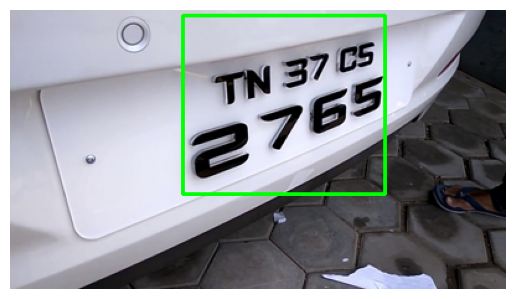

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Directory paths
image_dir = 'datasets/cars_license_plate_new/train/images'
label_dir = 'datasets/cars_license_plate_new/train/labels'

# Get the first image file
image_files = sorted(os.listdir(image_dir))
first_image_file = image_files[1]

# Construct paths for the image and its corresponding label
image_path = os.path.join(image_dir, first_image_file)
label_path = os.path.join(label_dir, os.path.splitext(first_image_file)[0] + '.txt')

# Load the image using OpenCV
image = cv2.imread(image_path)
# Convert the image from BGR (OpenCV default) to RGB (matplotlib default)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Read the label file to get bounding box information
with open(label_path, 'r') as f:
    lines = f.readlines()

# Plot the bounding box on the image
for line in lines:
    # Parse the label file line to extract bounding box information
    class_id, x_center, y_center, width, height = map(float, line.strip().split())
    img_height, img_width, _ = image.shape

    # Convert YOLO format to bounding box format
    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height

    # Calculate the top-left and bottom-right coordinates of the bounding box
    x1 = int(x_center - width / 2)
    y1 = int(y_center - height / 2)
    x2 = int(x_center + width / 2)
    y2 = int(y_center + height / 2)

    # Draw the bounding box on the image using a green rectangle
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the image with bounding box using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.show()  # Display the image

In [ ]:
# Define the content of the datasets.yaml file
datasets_yaml = '''
path: cars_license_plate_new

train: train/images
val: val/images
test: test/images

# number of classes
nc: 1

# class names
names: ['license_plate']
'''

# Write the content to the datasets.yaml file
with open('datasets.yaml', 'w') as file:
    file.write(datasets_yaml)

In [ ]:
from ultralytics import YOLO
model = YOLO('yolov9s.pt')

100%|██████████| 14.7M/14.7M [00:00<00:00, 128MB/s]


In [ ]:
model.train(
    data='datasets.yaml',  # Path to the dataset configuration file
    epochs=90,            # Number of training epochs
    batch=16,              # Batch size
    device='cuda',         # Use GPU for training
    imgsz=320,             # Image size (width and height) for training
    cache=True             # Cache images for faster training
)

Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov9s.pt, data=datasets.yaml, epochs=90, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=True, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, li

100%|██████████| 755k/755k [00:00<00:00, 26.8MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     31104  ultralytics.nn.modules.block.ELAN1           [64, 64, 64, 32]              
  3                  -1  1     73984  ultralytics.nn.modules.block.AConv           [64, 128]                     
  4                  -1  1    258432  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 128, 128, 64, 3]        
  5                  -1  1    221568  ultralytics.nn.modules.block.AConv           [128, 192]                    
  6                  -1  1    579648  ultralytics.nn.modules.block.RepNCSPELAN4    [192, 192, 192, 96, 3]        
  7                  -1  1    442880  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 103MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/datasets/cars_license_plate_new/train/labels... 345 images, 0 backgrounds, 0 corrupt: 100%|██████████| 345/345 [00:00<00:00, 775.92it/s]

train: New cache created: /content/datasets/cars_license_plate_new/train/labels.cache



train: Caching images (0.1GB RAM): 100%|██████████| 345/345 [00:05<00:00, 62.53it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/datasets/cars_license_plate_new/val/labels... 44 images, 0 backgrounds, 0 corrupt: 100%|██████████| 44/44 [00:00<00:00, 620.78it/s]

val: New cache created: /content/datasets/cars_license_plate_new/val/labels.cache



val: Caching images (0.0GB RAM): 100%|██████████| 44/44 [00:00<00:00, 74.34it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.0005), 227 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 90 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/22 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
       1/90      1.74G      1.867      2.532      1.446         19        320: 100%|██████████| 22/22 [00:12<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]

                   all         44         44      0.616      0.655      0.627      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/90      1.65G      1.462       1.14      1.262         20        320: 100%|██████████| 22/22 [00:06<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.91it/s]

                   all         44         44      0.832      0.432      0.602       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/90      1.67G      1.438      1.002       1.24         16        320: 100%|██████████| 22/22 [00:07<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.49it/s]

                   all         44         44     0.0235     0.0227    0.00218    0.00101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/90      1.66G      1.507      1.016      1.279         18        320: 100%|██████████| 22/22 [00:05<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.79it/s]

                   all         44         44     0.0235     0.0227    0.00218    0.00101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/90      1.66G      1.527      1.032      1.308         15        320: 100%|██████████| 22/22 [00:06<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.02it/s]

                   all         44         44     0.0235     0.0227    0.00218    0.00101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/90      1.67G      1.508     0.9665      1.272         18        320: 100%|██████████| 22/22 [00:05<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.67it/s]

                   all         44         44    0.00283     0.0227   0.000618   0.000124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/90      1.66G      1.558      1.051       1.32         13        320: 100%|██████████| 22/22 [00:06<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.09it/s]

                   all         44         44    0.00052     0.0682   0.000247   0.000113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/90      1.67G      1.556     0.9916      1.287         14        320: 100%|██████████| 22/22 [00:05<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.99it/s]

                   all         44         44     0.0042     0.0455   0.000967   0.000528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/90      1.66G      1.453     0.9062      1.251         14        320: 100%|██████████| 22/22 [00:07<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         44         44    0.00464     0.0455   0.000769   0.000371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/90      1.67G      1.407     0.8714      1.216         16        320: 100%|██████████| 22/22 [00:05<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.69it/s]

                   all         44         44     0.0424      0.295     0.0191     0.0087



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/90      1.66G      1.446      0.876      1.277         21        320: 100%|██████████| 22/22 [00:07<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]

                   all         44         44      0.262      0.386      0.132     0.0718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/90      1.67G      1.453     0.9064      1.271         15        320: 100%|██████████| 22/22 [00:05<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.20it/s]

                   all         44         44      0.709      0.829      0.818      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/90      1.66G      1.393     0.9017      1.237         20        320: 100%|██████████| 22/22 [00:07<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.03it/s]

                   all         44         44      0.881      0.795      0.894      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/90      1.67G       1.38     0.8742      1.211         20        320: 100%|██████████| 22/22 [00:05<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.13it/s]

                   all         44         44      0.764      0.882      0.837      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/90      1.66G      1.347     0.8528      1.178         16        320: 100%|██████████| 22/22 [00:06<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]

                   all         44         44        0.8      0.841      0.829       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/90      1.67G      1.361     0.8076      1.216         20        320: 100%|██████████| 22/22 [00:05<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.14it/s]

                   all         44         44      0.879      0.824      0.859      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/90      1.66G      1.325     0.8149      1.154         20        320: 100%|██████████| 22/22 [00:06<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]

                   all         44         44      0.753      0.818      0.811      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/90      1.67G      1.312     0.7895      1.198         19        320: 100%|██████████| 22/22 [00:06<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.89it/s]

                   all         44         44      0.879      0.818      0.851      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/90      1.66G      1.264     0.7647       1.16         20        320: 100%|██████████| 22/22 [00:06<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.36it/s]

                   all         44         44      0.856      0.841      0.881      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/90      1.67G      1.267     0.7798      1.171         14        320: 100%|██████████| 22/22 [00:05<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.76it/s]

                   all         44         44      0.865      0.818      0.889      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/90      1.66G      1.187     0.7273      1.152         19        320: 100%|██████████| 22/22 [00:06<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.12it/s]

                   all         44         44      0.859      0.833       0.88      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/90      1.67G      1.244     0.7169      1.171         20        320: 100%|██████████| 22/22 [00:05<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.65it/s]

                   all         44         44       0.97      0.818      0.894      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/90      1.66G      1.161     0.7281       1.13         20        320: 100%|██████████| 22/22 [00:07<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.42it/s]

                   all         44         44      0.917      0.864      0.906      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/90      1.67G      1.214     0.7065      1.137         17        320: 100%|██████████| 22/22 [00:05<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.78it/s]

                   all         44         44      0.896      0.795      0.834      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/90      1.66G      1.166     0.6951      1.134         27        320: 100%|██████████| 22/22 [00:06<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.09it/s]

                   all         44         44      0.919      0.771      0.837        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/90      1.67G      1.148     0.6804      1.095         17        320: 100%|██████████| 22/22 [00:05<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.24it/s]

                   all         44         44      0.941      0.886      0.938      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/90      1.66G      1.174     0.6962      1.123         17        320: 100%|██████████| 22/22 [00:06<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.58it/s]

                   all         44         44      0.906      0.874      0.892      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/90      1.67G      1.189     0.6774      1.126         17        320: 100%|██████████| 22/22 [00:05<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.15it/s]

                   all         44         44      0.905      0.886      0.881      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/90      1.66G      1.128     0.6622      1.107         19        320: 100%|██████████| 22/22 [00:06<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.00it/s]

                   all         44         44      0.924      0.773      0.862      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/90      1.67G      1.154     0.6812      1.116         17        320: 100%|██████████| 22/22 [00:05<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.43it/s]

                   all         44         44      0.912      0.818      0.874        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/90      1.66G      1.136     0.6635      1.106         12        320: 100%|██████████| 22/22 [00:07<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]

                   all         44         44      0.884      0.909      0.917      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/90      1.67G      1.131      0.676      1.105         17        320: 100%|██████████| 22/22 [00:05<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.13it/s]

                   all         44         44      0.899      0.806      0.902      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/90      1.66G      1.094     0.6631      1.093         17        320: 100%|██████████| 22/22 [00:07<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.22it/s]

                   all         44         44      0.829      0.883      0.888      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/90      1.67G      1.114     0.6648      1.101         17        320: 100%|██████████| 22/22 [00:05<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.44it/s]

                   all         44         44      0.948      0.822      0.903      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/90      1.66G      1.121     0.6452      1.083         15        320: 100%|██████████| 22/22 [00:07<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.55it/s]

                   all         44         44      0.951      0.879      0.917      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/90      1.67G      1.123     0.6504      1.096         17        320: 100%|██████████| 22/22 [00:05<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]

                   all         44         44       0.86      0.864      0.904        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/90      1.66G      1.076     0.6346      1.087         16        320: 100%|██████████| 22/22 [00:07<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]

                   all         44         44      0.907      0.841      0.902      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/90      1.67G      1.028     0.6019      1.068         15        320: 100%|██████████| 22/22 [00:05<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]

                   all         44         44      0.893      0.864      0.899      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/90      1.66G      1.039     0.6169      1.079         10        320: 100%|██████████| 22/22 [00:07<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.27it/s]

                   all         44         44      0.842      0.864      0.892      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/90      1.67G       1.02     0.6229      1.051         19        320: 100%|██████████| 22/22 [00:05<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.93it/s]

                   all         44         44      0.926      0.853       0.93      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/90      1.66G     0.9742     0.6207      1.037         16        320: 100%|██████████| 22/22 [00:07<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.93it/s]

                   all         44         44      0.922      0.801      0.931      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/90      1.67G     0.9674     0.5655      1.022         17        320: 100%|██████████| 22/22 [00:05<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]

                   all         44         44        0.9      0.822      0.931      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/90      1.66G      1.017     0.5905      1.051         13        320: 100%|██████████| 22/22 [00:07<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.27it/s]

                   all         44         44      0.947      0.841      0.902      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/90      1.67G      1.003     0.5775      1.061         14        320: 100%|██████████| 22/22 [00:05<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]

                   all         44         44      0.925      0.837      0.907      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/90      1.66G     0.9916     0.5728      1.022         22        320: 100%|██████████| 22/22 [00:08<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.87it/s]

                   all         44         44      0.844      0.858       0.82      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/90      1.67G     0.9987     0.5709      1.044         15        320: 100%|██████████| 22/22 [00:05<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.24it/s]

                   all         44         44      0.901      0.864      0.911      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/90      1.66G     0.9102     0.5377      1.018         15        320: 100%|██████████| 22/22 [00:07<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.44it/s]

                   all         44         44      0.902      0.841      0.902      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/90      1.67G     0.9524     0.5686      1.052         19        320: 100%|██████████| 22/22 [00:05<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.47it/s]

                   all         44         44      0.939      0.841       0.93      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/90      1.66G     0.9563     0.5387      1.036         20        320: 100%|██████████| 22/22 [00:07<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.46it/s]

                   all         44         44      0.923      0.864      0.933      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/90      1.67G     0.9056     0.5121     0.9955         21        320: 100%|██████████| 22/22 [00:05<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]

                   all         44         44       0.86      0.835      0.885      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/90      1.66G     0.9722     0.5554      1.006         14        320: 100%|██████████| 22/22 [00:07<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.64it/s]

                   all         44         44      0.878      0.815      0.901      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/90      1.67G      0.937     0.5519      1.024         15        320: 100%|██████████| 22/22 [00:05<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.47it/s]

                   all         44         44      0.893      0.818       0.89      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/90      1.66G     0.8978     0.5109      1.006         15        320: 100%|██████████| 22/22 [00:07<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]

                   all         44         44      0.898      0.841      0.889      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/90      1.67G     0.9151     0.5231     0.9882         15        320: 100%|██████████| 22/22 [00:05<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]

                   all         44         44      0.901      0.818      0.905      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/90      1.66G     0.9238      0.532      1.016         16        320: 100%|██████████| 22/22 [00:07<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.81it/s]

                   all         44         44      0.918      0.818      0.895      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/90      1.67G     0.8855     0.4999     0.9932         19        320: 100%|██████████| 22/22 [00:05<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.52it/s]

                   all         44         44      0.885      0.818      0.899      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/90      1.66G     0.8358     0.4892     0.9955         19        320: 100%|██████████| 22/22 [00:08<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]

                   all         44         44      0.883      0.856      0.903      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/90      1.67G     0.8467     0.4972      1.018         14        320: 100%|██████████| 22/22 [00:05<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.43it/s]

                   all         44         44      0.854      0.841      0.902      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/90      1.66G     0.8552     0.4761     0.9694         14        320: 100%|██████████| 22/22 [00:07<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.49it/s]

                   all         44         44      0.893      0.841        0.9      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/90      1.67G     0.8508     0.4764      1.004         20        320: 100%|██████████| 22/22 [00:05<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.96it/s]

                   all         44         44      0.874      0.841      0.885      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/90      1.66G     0.8325     0.4762      0.985         16        320: 100%|██████████| 22/22 [00:07<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all         44         44      0.862      0.886      0.904      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/90      1.67G     0.8434     0.4817     0.9741         14        320: 100%|██████████| 22/22 [00:05<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.60it/s]

                   all         44         44      0.848      0.909      0.902       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/90      1.66G      0.835      0.461     0.9619         20        320: 100%|██████████| 22/22 [00:07<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.54it/s]

                   all         44         44      0.883      0.858      0.887      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/90      1.67G     0.8286     0.4603     0.9802         14        320: 100%|██████████| 22/22 [00:05<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.06it/s]

                   all         44         44      0.878      0.864      0.891      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/90      1.66G     0.8421     0.4713     0.9936         17        320: 100%|██████████| 22/22 [00:06<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         44         44      0.886      0.909      0.908      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/90      1.67G     0.8177     0.4658     0.9913         14        320: 100%|██████████| 22/22 [00:05<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.23it/s]

                   all         44         44      0.878      0.886      0.915      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/90      1.66G     0.8111     0.4619     0.9794         17        320: 100%|██████████| 22/22 [00:06<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.73it/s]

                   all         44         44       0.85      0.841      0.897      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/90      1.67G       0.79     0.4575     0.9746         13        320: 100%|██████████| 22/22 [00:05<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.04it/s]

                   all         44         44      0.838      0.864      0.895      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/90      1.66G     0.8196     0.4531       0.97         17        320: 100%|██████████| 22/22 [00:06<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.81it/s]

                   all         44         44      0.883      0.856      0.896      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/90      1.67G     0.7791     0.4426     0.9619         20        320: 100%|██████████| 22/22 [00:05<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         44         44      0.863      0.859      0.886      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/90      1.66G     0.7581     0.4451     0.9321         15        320: 100%|██████████| 22/22 [00:06<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]

                   all         44         44      0.883      0.857      0.906      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/90      1.67G     0.7725     0.4266     0.9573         19        320: 100%|██████████| 22/22 [00:05<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]

                   all         44         44      0.902      0.839      0.919      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/90      1.66G     0.7691     0.4502     0.9679         20        320: 100%|██████████| 22/22 [00:06<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]

                   all         44         44      0.829      0.886      0.912      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/90      1.67G     0.7639     0.4246      0.944         18        320: 100%|██████████| 22/22 [00:06<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.43it/s]

                   all         44         44      0.891      0.841      0.921      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/90      1.66G     0.7441     0.4246     0.9467         17        320: 100%|██████████| 22/22 [00:06<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]

                   all         44         44      0.899      0.813      0.911      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/90      1.67G     0.7114     0.4079     0.9528         19        320: 100%|██████████| 22/22 [00:06<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.07it/s]

                   all         44         44      0.881      0.841      0.912      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/90      1.66G     0.7133     0.4005     0.9373         13        320: 100%|██████████| 22/22 [00:06<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         44         44      0.872      0.841      0.913      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/90      1.67G     0.7196     0.4019     0.9347         19        320: 100%|██████████| 22/22 [00:06<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.78it/s]

                   all         44         44      0.873      0.818      0.894      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/90      1.66G      0.745     0.4257     0.9811         17        320: 100%|██████████| 22/22 [00:06<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.76it/s]

                   all         44         44      0.823      0.864      0.906      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/90      1.67G     0.7162     0.4118     0.9267         21        320: 100%|██████████| 22/22 [00:06<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.60it/s]

                   all         44         44      0.883      0.859        0.9      0.539


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      81/90      1.66G     0.9853     0.5225      1.058          9        320: 100%|██████████| 22/22 [00:07<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.61it/s]

                   all         44         44      0.884      0.863      0.907      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      82/90      1.67G     0.9858     0.4824      1.065          9        320: 100%|██████████| 22/22 [00:05<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.74it/s]

                   all         44         44      0.869      0.905      0.933      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      83/90      1.66G     0.9363     0.4781      1.056          9        320: 100%|██████████| 22/22 [00:06<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]

                   all         44         44      0.836      0.925      0.938      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      84/90      1.67G     0.9673      0.476      1.033          9        320: 100%|██████████| 22/22 [00:05<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]

                   all         44         44      0.864      0.866       0.93      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      85/90      1.66G     0.9155     0.4537      1.029          9        320: 100%|██████████| 22/22 [00:06<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]

                   all         44         44      0.874      0.886      0.908      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      86/90      1.67G     0.9081     0.4554      1.043          9        320: 100%|██████████| 22/22 [00:06<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.37it/s]

                   all         44         44      0.873      0.886      0.902      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      87/90      1.66G     0.8829     0.4461      1.012          9        320: 100%|██████████| 22/22 [00:05<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.93it/s]

                   all         44         44      0.877      0.886      0.904      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      88/90      1.67G     0.8679     0.4495      1.014          9        320: 100%|██████████| 22/22 [00:07<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.29it/s]

                   all         44         44      0.882      0.886      0.914      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      89/90      1.66G     0.8853     0.4397      1.011          9        320: 100%|██████████| 22/22 [00:05<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.04it/s]

                   all         44         44      0.886       0.88      0.917      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      90/90      1.67G     0.8739     0.4368      1.017          9        320: 100%|██████████| 22/22 [00:07<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         44         44      0.878      0.864      0.921      0.548



90 epochs completed in 0.214 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 15.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 15.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9s summary (fused): 486 layers, 7,167,475 parameters, 0 gradients, 26.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]


                   all         44         44      0.878      0.886      0.915      0.579
Speed: 0.1ms preprocess, 3.4ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d2ea50840a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

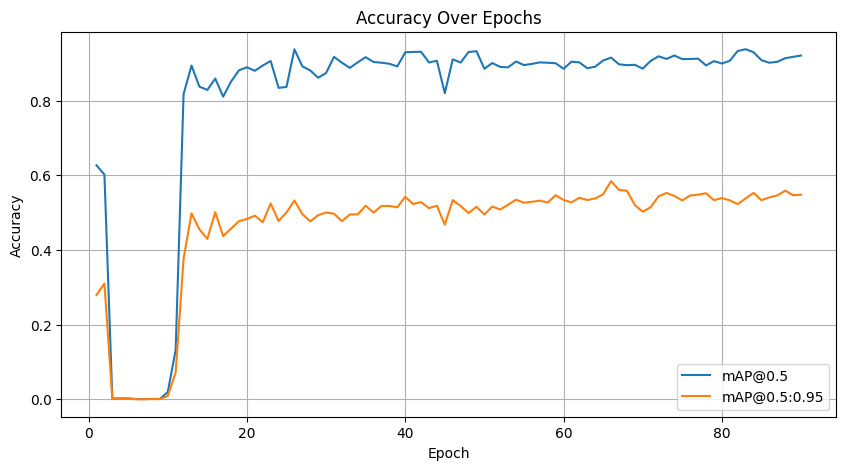

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob


# Find the most recent training log directory
log_dir = max(glob('runs/detect/train*'), key=the_number_in_the_string)

# Load the training results from the CSV file
results = pd.read_csv(os.path.join(log_dir, 'results.csv'))
results.columns = results.columns.str.strip()  # Remove any leading/trailing whitespace from column names

# Extract epochs and accuracy metrics
epochs = results.index + 1  # Epochs are zero-indexed, so add 1
mAP_0_5 = results['metrics/mAP50(B)']  # Mean Average Precision at IoU=0.5
mAP_0_5_0_95 = results['metrics/mAP50-95(B)']  # Mean Average Precision at IoU=0.5:0.95

# Plot the accuracy over epochs
plt.figure(figsize=(10, 5))
plt.plot(epochs, mAP_0_5, label='mAP@0.5')
plt.plot(epochs, mAP_0_5_0_95, label='mAP@0.5:0.95')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model.save('best_license_plate_model.pt')


In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip3 install easyocr


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 18.7 MB/s eta 0:00:00


In [ ]:
import easyocr
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO


def predict_and_plot(path_test_car):
    """
    Predicts and plots the bounding boxes on the given test image using the trained YOLO model.
    Also performs OCR on the detected bounding boxes to extract text.

    Parameters:
    path_test_car (str): Path to the test image file.
    """
    # Perform prediction on the test image using the model
    results = model.predict(path_test_car, device='cuda')

    # Load the image using OpenCV
    image = cv2.imread(path_test_car)
    # Convert the image from BGR (OpenCV default) to RGB (matplotlib default)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    reader = easyocr.Reader(['en'])

    # Extract the bounding boxes and labels from the results
    for result in results:
        for box in result.boxes:
            # Get the coordinates of the bounding box
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            # Get the confidence score of the prediction
            confidence = box.conf[0]

            # Draw the bounding box on the image
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            # Draw the confidence score near the bounding box
            cv2.putText(image, f'{confidence*100:.2f}%', (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

            # Crop the bounding box from the image for OCR
            roi = gray_image[y1:y2, x1:x2]

            # Perform OCR on the cropped image
            text = reader.readtext(roi)
            if len(text) > 0:
                text = text[0][1]
            cv2.putText(image, f'{text}', (x1, y1 +50 ),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 102, 255), 1)
            print(f"Detected text: {text}")

    # Plot the image with bounding boxes
    plt.imshow(image)
    plt.axis('off')  # Hide the axis
    plt.show()  # Display the image


image 1/1 /content/datasets/cars_license_plate_new/test/images/Cars287.png: 288x320 1 license_plate, 194.2ms
Speed: 1.4ms preprocess, 194.2ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 320)
Detected text: DL7C N 5617


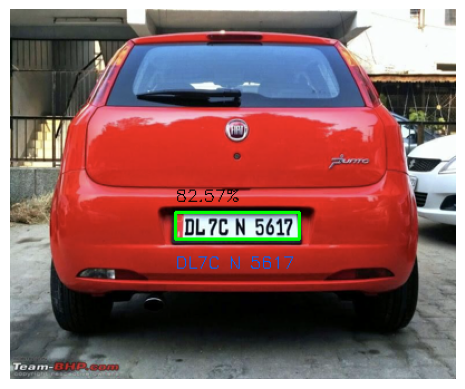

In [ ]:
predict_and_plot('/content/datasets/cars_license_plate_new/test/images/Cars287.png')
